In [1]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=[]
for i in range(7):
    with open('df201'+str(i+2)+'1'+str(i+3)+'.pkl', 'rb') as f:
        df.append( pickle.load(f))
df_all=pd.DataFrame()

for j in range(30):
    for k in range(7):
        df_all=df_all.append(df[k][j]).reset_index(drop=True)

In [3]:
df_all.head()

,attend,gameDateEst,homeTeam,visitorTeam,homeTeamId,visitorTeamId,season,game_unix_timestamp,score,num_comments,score_norm,num_comments_norm,title
0,18238,2012-11-02 19:30:00,Atlanta Hawks,Houston Rockets,1610612737,1610612745,2013,1351884600,None,None,None,None,None
1,10684,2012-11-07 19:30:00,Atlanta Hawks,Indiana Pacers,1610612737,1610612754,2013,1352316600,None,None,None,None,None
2,16785,2012-11-09 19:30:00,Atlanta Hawks,Miami Heat,1610612737,1610612748,2013,1352489400,None,None,None,None,None
3,15066,2012-11-19 19:30:00,Atlanta Hawks,Orlando Magic,1610612737,1610612753,2013,1353353400,None,None,None,None,None
4,11338,2012-11-21 19:30:00,Atlanta Hawks,Washington Wizards,1610612737,1610612764,2013,1353526200,None,None,None,None,None


In [7]:
df_new=pd.DataFrame()
temp_dic={}
temp_list=[]
for m in range(len(df_all['score'])):
    if df_all['score'][m]!=None:
        temp_dic={'score':df_all['score'][m],'num_comments':df_all['num_comments'][m],
              'gameDateEst':df_all['gameDateEst'][m],'attend':df_all['attend'][m]}
    temp_list.append(temp_dic)
df_new=pd.DataFrame(temp_list)
df_new = df_new.dropna()
df_new = df_new.set_index('gameDateEst')
df_new.head()

,attend,num_comments,score
gameDateEst,,,
2013-11-01 19:30:00,18118.0,11.0,5.0
2013-11-09 19:30:00,15189.0,14.0,23.0
2013-11-13 20:00:00,15057.0,281.0,37.0
2013-11-15 19:30:00,12070.0,66.0,11.0
2013-11-20 19:30:00,13167.0,84.0,11.0


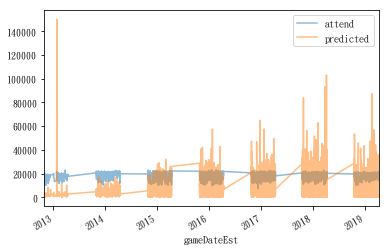

In [9]:
column=['score','num_comments']
X=df_new[column]
y=df_new['attend']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
df_new['predicted']=model.predict(X)
df_new[['attend', 'predicted']].plot(alpha=0.5)